## Data Pre-processing 

In [1]:
# install packages 

In [2]:
# import packapges
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# importing data 
df = pd.read_excel('/Credit data.xlsx')


In [4]:
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0.629741,32,0,338.000000,NaN,2,0,0,0,0.0
9996,0,0.062614,62,0,745.000000,NaN,10,0,1,0,0.0
9997,0,0.827427,50,0,1904.000000,NaN,4,0,0,0,0.0
9998,0,0.091174,77,1,0.020636,10999.0,9,0,0,0,0.0


In [5]:
# Take a look at the data 
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [89]:
df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

####  Exploratory data analysis

In [6]:
# Description of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      10000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  10000 non-null  float64
 2   age                                   10000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  10000 non-null  int64  
 4   DebtRatio                             10000 non-null  float64
 5   MonthlyIncome                         8026 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       10000 non-null  int64  
 7   NumberOfTimes90DaysLate               10000 non-null  int64  
 8   NumberRealEstateLoansOrLines          10000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  10000 non-null  int64  
 10  NumberOfDependents                    9716 non-null   float64
dtypes: float64(4), i

There are 10000 instances in the dataset .Notice that MonthlyIncome has only 8026 non-null values. meaning that 1974 observations are missing
this feature. We will need to take care of this later.

The same also for NumberOfDependents with 9716 non-null values.

All attributes are numerical.

So let's show the summary of the numerical attributes.

In [7]:
# Descriptive statistics
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,8026.000000,10000.00000,10000.00000,10000.00000,10000.000000,9716.000000
mean,0.064000,4.931206,52.164200,0.385100,350.457248,6606.379143,8.34500,0.23150,1.00800,0.202200,0.748868
std,0.244765,160.479674,14.778792,3.723733,2243.983903,6787.373041,5.06738,3.69154,1.08446,3.675985,1.126723
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.031135,41.000000,0.000000,0.173605,3400.000000,5.00000,0.00000,0.00000,0.000000,0.000000
50%,0.000000,0.165328,52.000000,0.000000,0.367083,5400.000000,8.00000,0.00000,1.00000,0.000000,0.000000
75%,0.000000,0.571746,62.000000,0.000000,0.847257,8200.000000,11.00000,0.00000,2.00000,0.000000,1.000000
max,1.000000,9340.000000,101.000000,98.000000,168835.000000,208333.000000,46.00000,98.00000,17.00000,98.000000,20.000000


The summary of the target variable, ‘SeriousDlqin2yrs’ shows that the target variable takes only 2 values: 0 for no default and 1.

Based on a mean of 0.064000, we can tell that the proportion of defaults in the data set is 6.4%. 

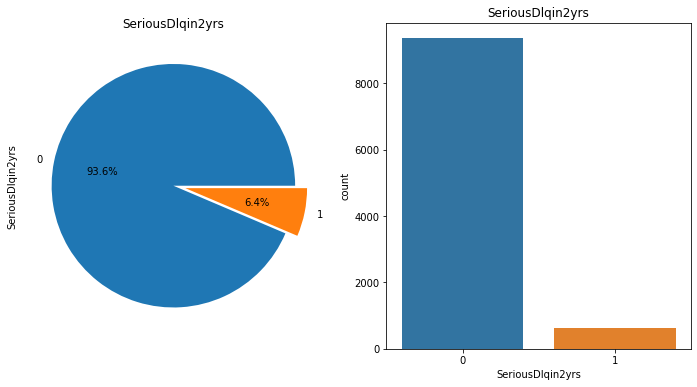

In [8]:
import warnings
warnings.filterwarnings('ignore')
# Let's check out the distribution of our Target variable
fig, axes = plt.subplots(1,2,figsize=(12,6))
df['SeriousDlqin2yrs'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=axes[0])
axes[0].set_title('SeriousDlqin2yrs')
#ax[0].set_ylabel('')
sns.countplot('SeriousDlqin2yrs',data=df,ax=axes[1])
axes[1].set_title('SeriousDlqin2yrs')
plt.show()


*   SeriousDlqin2yrs is highly skewed variable i.e., very few borrowers have experienced 90 days past due delinquency or worse within 2 years.
*   Roughly 6.7% of the borrowers have become defaulters

Lets discover more the other features.

In [9]:
# Statistics Summary
round(df.describe(percentiles=[0.01,0.05,0.10,0.25,0.75,0.90,0.95,0.99]),2)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,10000.00,10000.00,10000.00,10000.00,10000.00,8026.00,10000.00,10000.00,10000.00,10000.00,9716.00
mean,0.06,4.93,52.16,0.39,350.46,6606.38,8.35,0.23,1.01,0.20,0.75
std,0.24,160.48,14.78,3.72,2243.98,6787.37,5.07,3.69,1.08,3.68,1.13
min,0.00,0.00,21.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1%,0.00,0.00,24.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5%,0.00,0.00,29.00,0.00,0.00,1320.00,2.00,0.00,0.00,0.00,0.00
10%,0.00,0.00,33.00,0.00,0.03,2052.50,3.00,0.00,0.00,0.00,0.00
25%,0.00,0.03,41.00,0.00,0.17,3400.00,5.00,0.00,0.00,0.00,0.00
50%,0.00,0.17,52.00,0.00,0.37,5400.00,8.00,0.00,1.00,0.00,0.00
75%,0.00,0.57,62.00,0.00,0.85,8200.00,11.00,0.00,2.00,0.00,1.00


- SeriousDlqin2yrs variable takes 2 values in training dataset which is what expected 0 & 1.

- RevolvingUtilizationOfUnsecuredLines :

*Defined as ratio of the total amount of money owed to total credit limit.


*It is expected that as this value increases, the proportion of people defaulting should increase as well.
*RevolvingUtilizationOfUnsecuredLines has extremely skewed distribution towards the right end of the distribution.

- Age : the min is 21 ans max is 87 years old.

- NumberOfTime30-59DaysPastDueNotWorse

- DebtRatio : we need to look at the distribution plot to know more.

- MonthlyIncome : we need to look at the distribution plot to know more.

- NumberOfOpenCreditLinesAndLoans : we need to look at the distribution plot to know more.

- NumberOfTimes90DaysLate

- NumberRealEstateLoansOrLines 

- NumberOfTime60-89DaysPastDueNotWorse

- NumberOfDependents takes the maximum value of 20  , so we need need to examine this values

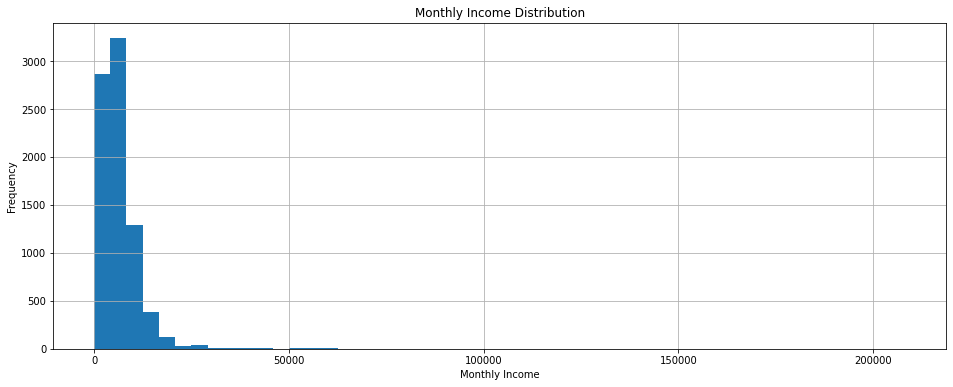

In [10]:
# Distribution of MonthlyIncome

df["MonthlyIncome"].hist(figsize=(16, 6), bins = 50)
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.title('Monthly Income Distribution');

The distribution of MonthlyIncome feature is very skewed potentially because of the presence of the outliers.

Also as we have seen that 99% of the people are having an income less than 25256.25(dollars) while only 1% of the borrowers are having an income greater than 25256.25(dollars). So to prevent our model from these outliers we need to winsorize/cap the upper tail of the MonthlyIncome Distribution.

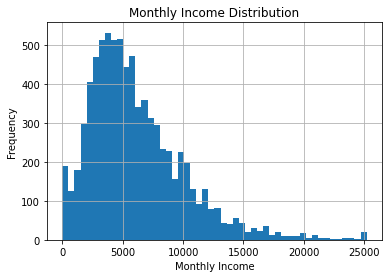

In [11]:
# Distribution of MonthyIncome after removing maximum value in the variable
df.loc[(df['MonthlyIncome'] < 25256.25),"MonthlyIncome"].hist(bins=50)
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.title('Monthly Income Distribution');

After capping the upper tail we can see the distribution more clearly that the distribution is Positively skewed representing that majority of the people are having an income less than 15,000(dollars) even after capping the outliers. This is not actually strange to see this kind of distribution as this is what we observe in real life.

We can apply relevant transformation to make the distribution more Gaussian/Normal like.

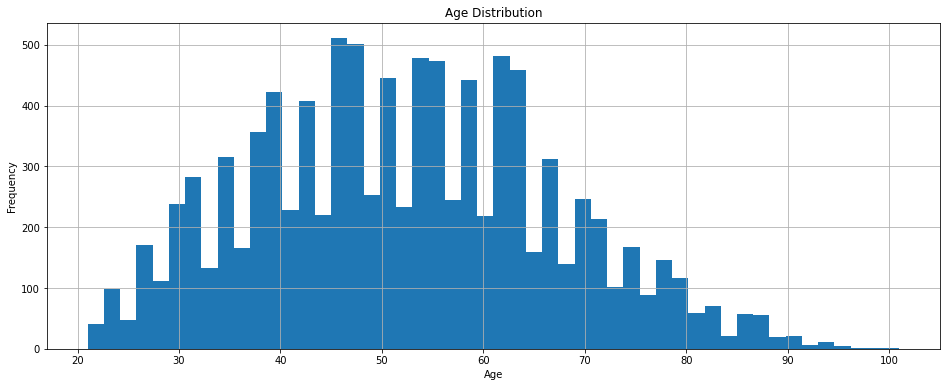

In [12]:
# Distribution of Age
df["age"].hist(figsize=(16, 6), bins = 50)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution');

The distribution looks normal.

In [13]:
# Distribution of NumberOfDependents
df['NumberOfDependents'].unique()

array([ 2.,  1.,  0., nan,  3.,  4.,  5.,  6.,  8.,  7., 20.])

We notice here that there are missing values in NumberOfDependents feature.

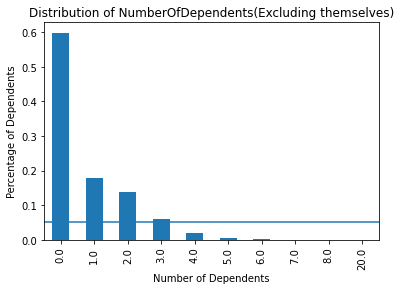

In [14]:
#
df['NumberOfDependents'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel('Number of Dependents')
plt.ylabel('Percentage of Dependents')
plt.axhline(0.05)
plt.title('Distribution of NumberOfDependents(Excluding themselves)');

We observe that the NumberOfDependents>3 appear less than 5% of the times in dataset. That is most of the borrowers have 0-3 number of dependents excluding the borrower in his/her family.

As we noted earlier that, we also need to impute missing values of this variable.

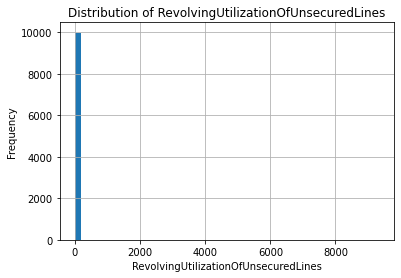

In [15]:
# Distribution of RevolvingUtilizationOfUnsecuredLines
df['RevolvingUtilizationOfUnsecuredLines'].hist(bins=50)
plt.xlabel('RevolvingUtilizationOfUnsecuredLines')
plt.ylabel('Frequency')
plt.title('Distribution of RevolvingUtilizationOfUnsecuredLines'); 

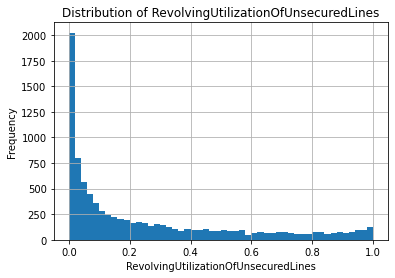

In [16]:
#Distribution of RevolvingUtilizationOfUnsecuredLines feature if we cap the upperbound by 97.5th percentile
df.loc[df['RevolvingUtilizationOfUnsecuredLines'] < df['RevolvingUtilizationOfUnsecuredLines'].quantile(0.975),'RevolvingUtilizationOfUnsecuredLines'].hist(bins=50);
plt.xlabel('RevolvingUtilizationOfUnsecuredLines')
plt.ylabel('Frequency')
plt.title('Distribution of RevolvingUtilizationOfUnsecuredLines'); 

- RevolvingUtilizationOfUnsecuredLines
Defined as ratio of the total amount of money owed to total credit limit
It is expected that as this value increases, the proportion of people defaulting should increase as well.

When we cap the upper tail of the distribution of RevolvingUtilizationOfUnsecuredLines feature in the dataset the distribution starts giving us a better and clear picture that most of the borrowers in our dataset have lower RevolvingUtilizationOfUnsecuredLines ratio indicates that most of the borrowers own less money relative to their total credit limit.

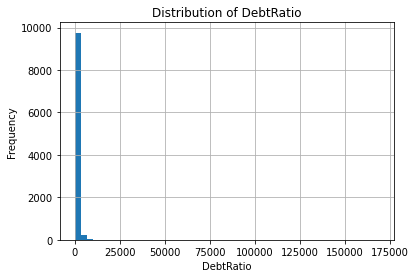

In [17]:
# Distribution of DebtRatio
df['DebtRatio'].hist(bins=50)
plt.xlabel('DebtRatio')
plt.ylabel('Frequency')
plt.title('Distribution of DebtRatio');

We observe that the distribution of Debt to Income feature is extremely skewed.

In [18]:
df['DebtRatio'].describe(percentiles=[0.01,0.05,0.10,0.25,0.75,0.90,0.95,0.975,0.99])

count     10000.000000
mean        350.457248
std        2243.983903
min           0.000000
1%            0.000000
5%            0.004089
10%           0.030747
25%           0.173605
50%           0.367083
75%           0.847257
90%        1227.000000
95%        2367.300000
97.5%      3308.175000
99%        4795.080000
max      168835.000000
Name: DebtRatio, dtype: float64

We above see that just only 1% of the people are having a debt-to-income ratio greater than 4795.08 in the dataset.
These borrowers with such high debt-to-income ratio could be the defaulters so we need to investigate this who are these borrowers with such a high debt-to-income ratio.

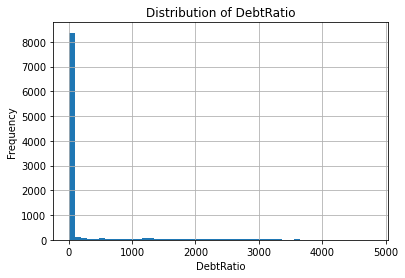

In [19]:
# Distribution of DebtRatio feature if we cap the upperbound by 95th percentile
df.loc[df['DebtRatio'] < df['DebtRatio'].quantile(0.99),'DebtRatio'].hist(bins=50);
plt.xlabel('DebtRatio')
plt.ylabel('Frequency')
plt.title('Distribution of DebtRatio'); 

In [20]:
print('Number of borrowers that have greater than  100% Debt-to-income-Ratio',len(df.loc[df['DebtRatio'] > 1 ,'DebtRatio']))
print('-'*75)

Number of borrowers that have greater than  100% Debt-to-income-Ratio 2315
---------------------------------------------------------------------------


We above again see that even after capping the distribution the distribution of DebtRatio still looks positively skewed.
There are quite high number of borrowers with more than 100% Debt-to-Income ratio in dataset. So it's possible then that these high DebtRatio values might not be outliers.

In [21]:
# Distribution of NumberOfOpenCreditLinesAndLoans
df['NumberOfOpenCreditLinesAndLoans'].unique()

array([13,  4,  2,  5,  7,  3,  8,  9,  6, 10, 14, 22, 17,  1, 15, 31, 12,
       21, 11, 19, 18, 26, 20, 23,  0, 16, 27, 29, 28, 24, 25, 32, 46, 33,
       30, 34, 37, 38])

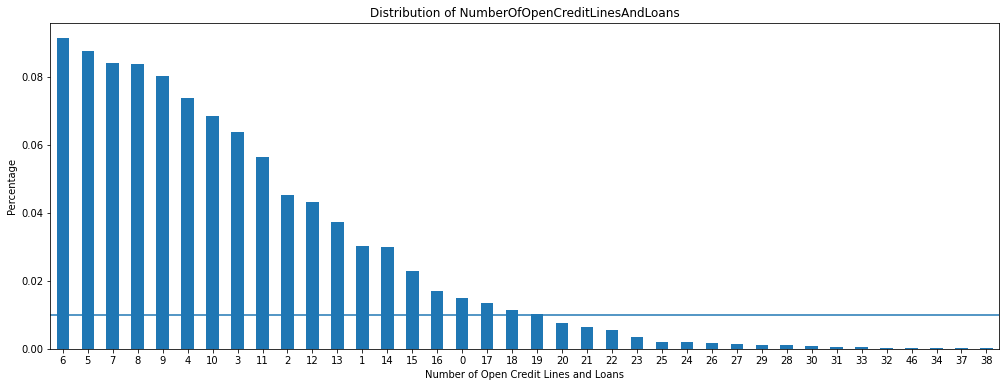

In [22]:
plt.figure(figsize=(17,6))
# Original Distribution of NumberOfOpenCreditLinesAndLoans
df['NumberOfOpenCreditLinesAndLoans'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel('Number of Open Credit Lines and Loans')
plt.ylabel('Percentage')
plt.axhline(0.01)
plt.xticks(rotation=0)
plt.title('Distribution of NumberOfOpenCreditLinesAndLoans');

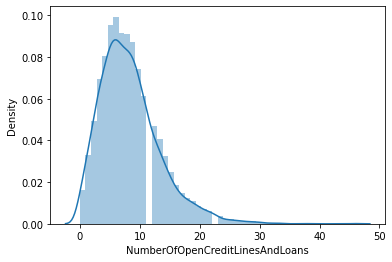

In [23]:
# Plotting the distribution of Number of Open credit lines and loans
sns.distplot(df["NumberOfOpenCreditLinesAndLoans"]);

- Most of the borrowers are having an open loans(installment like car loan or mortgage) and lines of credit(credit cards) are less than 18.
- The distribution is skewed in both the dataset probably because of potential outliers.

In [24]:
# Distribution of NumberRealEstateLoansOrLines

df['NumberRealEstateLoansOrLines'].unique()

array([ 6,  0,  1,  3,  4,  2,  5,  8,  7,  9, 17, 15, 10, 12, 11])

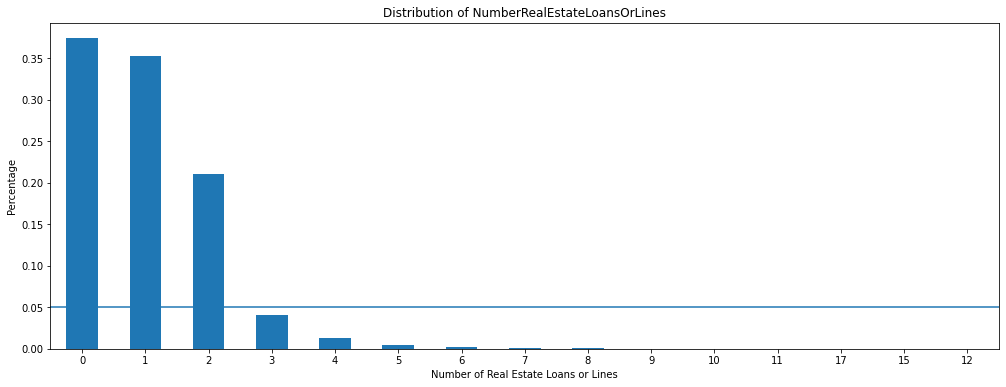

In [25]:
plt.figure(figsize=(17,6))
# Original Distribution of NumberRealEstateLoansOrLines
df['NumberRealEstateLoansOrLines'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel('Number of Real Estate Loans or Lines')
plt.ylabel('Percentage')
plt.axhline(0.05)
plt.xticks(rotation=0)
plt.title('Distribution of NumberRealEstateLoansOrLines');

- Most of the borrowers are having Real estate loans or lines less than or equal to 2. 

In [26]:
# Distribution of NumberOfTime30-59DaysPastDueNotWorse
df['NumberOfTime30-59DaysPastDueNotWorse'].unique()


array([ 2,  0,  1,  3,  4,  5,  7, 10,  6, 98, 12,  8])

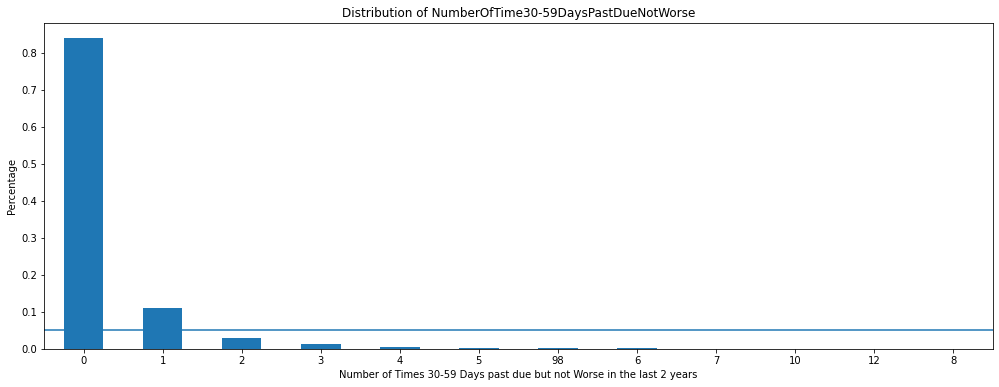

In [27]:
plt.figure(figsize=(17,6))
# Original Distribution of NumberOfTime30-59DaysPastDueNotWorse in training dataset
df['NumberOfTime30-59DaysPastDueNotWorse'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel('Number of Times 30-59 Days past due but not Worse in the last 2 years')
plt.ylabel('Percentage')
plt.axhline(0.05)
plt.xticks(rotation=0)
plt.title('Distribution of NumberOfTime30-59DaysPastDueNotWorse');

We see that most of the customer have either paid their payment on time i.e., the value=0 or they have been late in making the payment only 1-time and there are very few number of times the borrowers have been late 30-59 days past.

But there are some borrowers who have been late 98 times and there are no borrowers who have made late payment more than 12 times and less than 98 times, this is strange!!!

In [28]:
# Distribution of NumberOfTime60-89DaysPastDueNotWorse
df['NumberOfTime60-89DaysPastDueNotWorse'].unique()

array([ 0,  1,  2,  5,  3, 98,  4,  6])

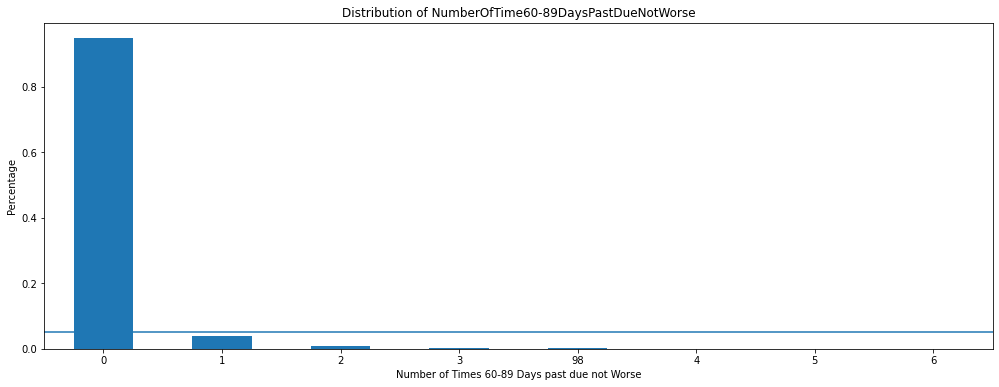

In [29]:
plt.figure(figsize=(17,6))
# Original Distribution of NumberOfTime60-89DaysPastDueNotWorse
df['NumberOfTime60-89DaysPastDueNotWorse'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel('Number of Times 60-89 Days past due not Worse')
plt.ylabel('Percentage')
plt.axhline(0.05)
plt.xticks(rotation=0)
plt.title('Distribution of NumberOfTime60-89DaysPastDueNotWorse');

Similarily, there are zero number of times a borrower has been 60-89 days late in making the payment.
There are some borrowers who have made late payment 98 times. Again these number look strange!

In [30]:
# Distribution of NumberOfTimes90DaysLate
df['NumberOfTimes90DaysLate'].unique()

array([ 0,  1,  3,  2,  5,  4, 98, 10,  9,  6,  7,  8])

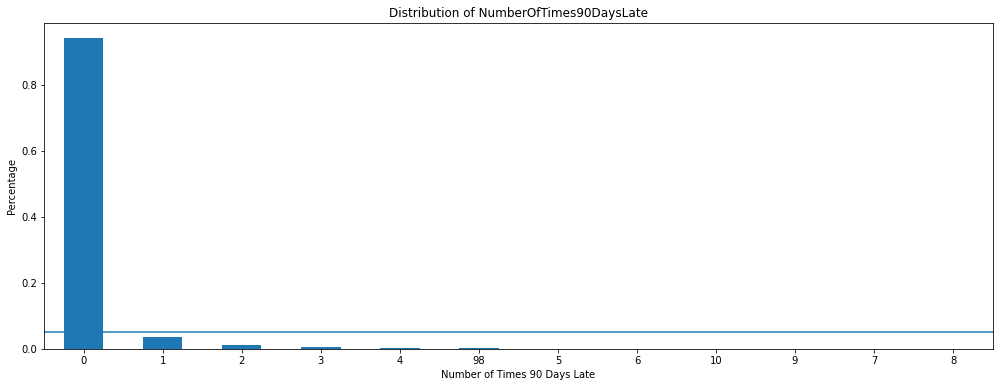

In [31]:
plt.figure(figsize=(17,6))
# Original Distribution of NumberOfTimes90DaysLate
df['NumberOfTimes90DaysLate'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel('Number of Times 90 Days Late')
plt.ylabel('Percentage')
plt.axhline(0.05)
plt.xticks(rotation=0)
plt.title('Distribution of NumberOfTimes90DaysLate');

Similarily, here as well, there are very zero number of times a borrower has been late beyond 90 days in making the payment.

Again there are some strange values taken by this variable i.e. 98.

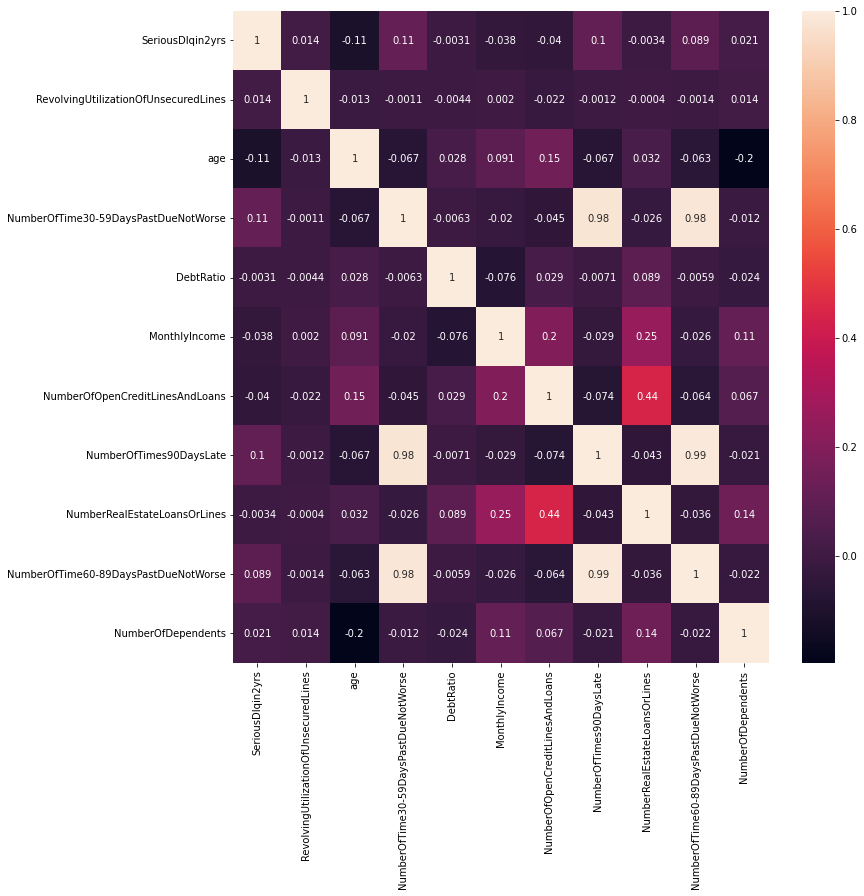

In [32]:
# Correlation
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True);

# Data preparation 
## Missing value

Any variables with count not equal to 10000, have missing values. There are 2 such variables: ‘MonthlyIncome’ and ‘NumberOfDependents’. Since the missing values did not exceed 25% of the data, let’s replace the missing values with the median of the variables.

In [33]:
df.isnull().sum(axis=0)

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                           1974
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                       284
dtype: int64

In [34]:
# Replace Na

# Replace NA with median values
fill_values = {}
for i in range(2, df.shape[1]):
    fill_values[df.columns[i]] = np.nanmedian(df[df.columns[i]])
df2 = df.fillna(fill_values)

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      10000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  10000 non-null  float64
 2   age                                   10000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  10000 non-null  int64  
 4   DebtRatio                             10000 non-null  float64
 5   MonthlyIncome                         10000 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       10000 non-null  int64  
 7   NumberOfTimes90DaysLate               10000 non-null  int64  
 8   NumberRealEstateLoansOrLines          10000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  10000 non-null  int64  
 10  NumberOfDependents                    10000 non-null  float64
dtypes: float64(4), i

In [36]:
dataset = df2.loc[:, df.columns != 'SeriousDlqin2yrs']
print(dataset.shape)
dataset['RevolvingUtilizationOfUnsecuredLines'] = np.log(dataset['RevolvingUtilizationOfUnsecuredLines'] + 1)
dataset['NumberOfTimes90DaysLate'] = np.log(dataset['NumberOfTimes90DaysLate'] + 1)
dataset['NumberOfTime60-89DaysPastDueNotWorse'] = np.log(dataset['NumberOfTime60-89DaysPastDueNotWorse'] + 1)
dataset['NumberOfTime30-59DaysPastDueNotWorse'] = np.log(dataset['NumberOfTime30-59DaysPastDueNotWorse'] + 1)
dataset['NumberRealEstateLoansOrLines'] = np.log(dataset['NumberRealEstateLoansOrLines'] + 1)
dataset['MonthlyIncome'] = np.log(dataset['MonthlyIncome'] + 1)


(10000, 10)


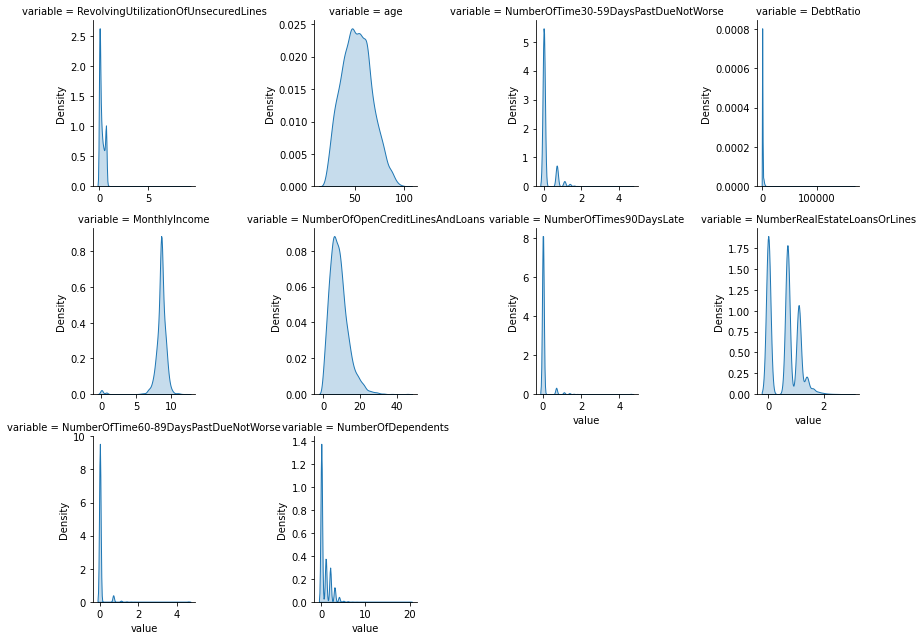

In [37]:
df_melt = dataset.melt()

# Use seaborn's facetgrid function to plot the density distributions of all variables on a single graph
g = sns.FacetGrid(df_melt, col="variable", col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.kdeplot, "value", shade=True)
# Show the plot
plt.show()

In [38]:
# before we convert target variable to 
df2.SeriousDlqin2yrs = (df2.SeriousDlqin2yrs).astype('category')

In [39]:
# split data to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset,df2['SeriousDlqin2yrs'],test_size = 0.3,random_state=100,shuffle = True)

In [40]:
print(y_train.value_counts()[1]/X_train.shape[0])
print(y_test.value_counts()[1]/X_test.shape[0])

0.06257142857142857
0.06733333333333333


We can see that only approximately 7% of our data has ‘SeriousDlqin2yrs’ as 1 which means that the dataset is highly imbalanced which is normal when doing any kinds of anomaly detection.

In [41]:
# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [42]:
# logistic regression: 

logreg = LogisticRegression(random_state=42, class_weight='balanced')
logreg.fit(X_train, y_train)

y_pred_log = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)
print(round(acc_log,2,), "%")

82.39 %


In [43]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

y_pred_rf = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

99.99 %


In [44]:
results = pd.DataFrame({
    'Model': [ 'Logistic Regression', 
              'Random Forest'],
    'Score': [acc_log, 
              acc_random_forest]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
99.99,Random Forest
82.39,Logistic Regression


#### Features importance for logistic regression

In [45]:
# features importance for logistic regression
importance_df = pd.DataFrame({'feature': X_train.columns,
              'coefficient': logreg.coef_.flatten().tolist()}).sort_values(by='coefficient', ascending=False)

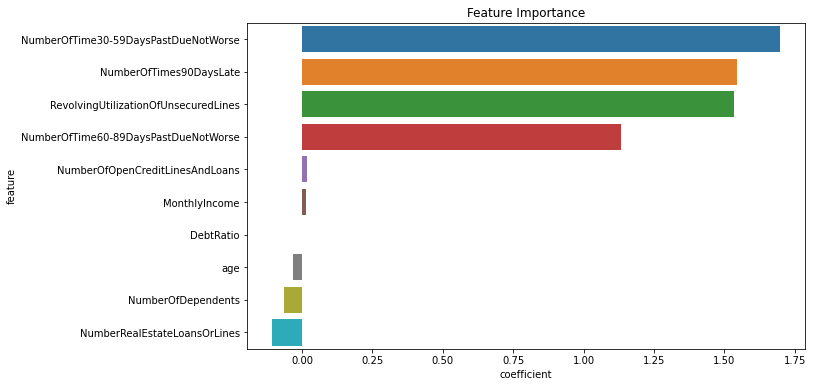

In [46]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df, x='coefficient', y='feature');

The feature with the highest importance is NumberOfTime30-59DaysPastDueNotWorse , followed by NumberOfTimes90DaysLate ,RevolvingUtilizationOfUnsecuredLines and NumberOfTime60-89DaysPastDueNotWorse.
The remaining features have lower importance in the model. This suggests that they may have a lesser impact on the model's predictions compared to the top four features.
